# Tutorial 1 — Poisson processes, Bayesian inference, and spike trains

**Author:** [Vito Dichio](https://sites.google.com/view/vito-dichio/home),
Fellow in AI, ENS–PSL, Paris — ✉️ vito.dichio@psl.eu

**Course:** *Machine Learning: Theory and Applications*
Master in Cognitive Sciences, ENS–PSL — Fall 2025/26 (Lecturer: Simona Cocco)

**Format:** Practical Session (TD)

#### 🎯 **Goals**
1) simulate Poisson spike trains;  
2) compute the posterior for rate under a simple prior;  
3) compare model vs data.

#### Bibliography:
Cocco et al., *From Statistical Physics to Data-Driven Modelling: with Applications to Quantitative Biology*, Oxford University Press (2022)

### Setup

In [2]:
# Import the necessary packages
import matplotlib.pyplot as plt
import numpy as np

# Set a seed for reproducibility
SEED = 11092025
rng = np.random.default_rng(SEED)

## Part A — Simulated data
In a homogeneous Poisson process with rate $\theta$ (spikes/s), the spike count $N(T)$ in a window of length $T$ has the following distribution:
$$
\Pr[N(T)=k] = \frac{(\theta T)^k e^{-\theta T}}{k!}, \quad k=0,1,2,\dots
$$

#### 🎯 Question A1
 Simulate a Poisson process with rate $\theta=0.5$, and different observation times $T=10, 100, 1000$. Plot the spike times for each $T$.

#### 🎯 Question A2
 From the observed counts (not spike times), compute the posterior distribution of the rate parameter $\theta$.
Assume a uniform prior on $\theta>0$.

#### 🎯 Question A3
 Compute **(i)** the posterior mean estimator, **(ii)** the Maximum Likelihood Estimator (MLE), and **(iii)** the estimator variance.

## Part B — Experimental data
We’ll load spike times for 40 retinal ganglion cells responding to a repeated natural movie (duration per repeat **stim_t = 26.5 s**; repeated ~120 times).

Data from [Schneidman et al., 2006 — *Weak pairwise correlations imply strongly correlated network states in a neural population*, Nature](https://www.nature.com/articles/nature04701)</small>


In [3]:
# length (in seconds) of periodic stimulus
stim_t = 26.5

### Loading the spike data

The file `dati2-berry.dat` contains the spike times (in seconds) of **40 retinal ganglion cells** recorded during repeated presentation of a natural movie.
- The file is a **one-column array** of spike times, concatenated across neurons.
- Each neuron’s block of spikes is preceded by the marker value **4000**, followed by the **neuron ID**.
- After these two entries, the subsequent numbers are the actual spike times (in seconds) for that neuron.

In [4]:
# load data
data = np.loadtxt('data/dati2-berry.dat')
data

array([4.00000000e+03, 4.00000000e+00, 2.08000004e-01, ...,
       3.17675360e+03, 3.17903420e+03, 3.17946570e+03])

In [5]:
# Each block looks like: [4000, neuron_id, spike_t1, spike_t2, ...].

# Split at every 4000 (skip the very first to avoid an empty block)
datas = np.split(data, np.where(data == 4000)[0][1:])

# Drop the marker (4000) and neuron ID, keep only spike times
datas = [d[2:] for d in datas]

print(f"Loaded {len(datas)} neurons.")

Loaded 40 neurons.


#neurons: 40
Neuron 0: #spikes=12824, max time=3179.37s


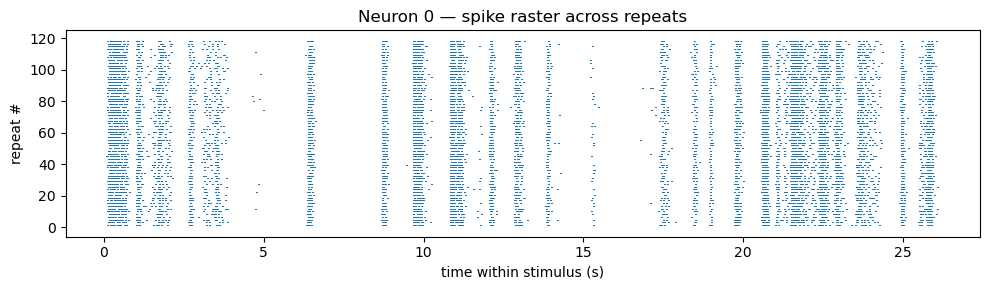

In [6]:
### Quick sanity checks and a first plot

if datas is not None:
    n_neurons = len(datas)

    # First neuron spikes
    spikes0 = np.asarray(datas[0], dtype=float)

    print(f"#neurons: {n_neurons}")
    print(f"Neuron 0: #spikes={spikes0.size}, max time={spikes0.max():.2f}s")

    # Raster within a single stimulus window (folded mod stim_t)
    plt.figure(figsize=(10, 3))

    # Fold spike times into the stimulus cycle:
    folded = spikes0 % stim_t       # position of each spike within one 26.5s repeat
    reps   = (spikes0 // stim_t).astype(int)  # which repetition the spike belongs to

    # Plot a raster: each spike is a vertical line at 'folded' time,
    # placed on the row of its repetition number.
    plt.vlines(folded, reps - 0.2, reps + 0.2)

    plt.xlabel("time within stimulus (s)")
    plt.ylabel("repeat #")
    plt.title("Neuron 0 — spike raster across repeats")
    plt.tight_layout()
    plt.show()

#### 🎯 Question B1
 Assuming a homogeneous Poisson process over the whole recording for neuron 0, infer its spiking rate. Specifically:
**(i)** compute and plot the posterior $P(\theta \mid y)$ under the same Uniform($\theta\ge0$) prior;
**(ii)** compute the posterior mean, variance, and MLE.

#### 🎯 Question B2
Simulate a Poisson process using your posterior mean rate for neuron 0 over the same duration **T**.
Compare:
- raster **within a single stimulus window** (use modulo `stim_t`),
- **inter-spike interval** distributions (data vs simulation).

**Bonus:** overlay the theoretical exponential inter-spike interval ISI density $ f(\Delta t) = \theta e^{-\theta \Delta t} $.

# Optional tasks

**Question C1** (Theory): Prove that if the event rate is constant $\theta$, then the number of events $N(T)$ observed in a time window of duration $T$ follows a Poisson distribution with mean $\theta T$:
$$
\Pr[N(T)=k] = e^{-\theta T}\,\frac{(\theta T)^k}{k!}, \quad k=0,1,2,\dots
$$